## Modèles SIR simples

### Introduction

Au cours de l'histoire, les épidémies ont profondément influencé l'histoire des sociétés et civilisations.
 De multiples épidémies de grandes ampleures, telle que la peste d'Athènes en 400 après JC, ont été documentées avec beaucoup de précision (évolution du nombre de cas, symptômes, nombre de morts,...). Ces registres étaient probablement utiles pour l'observation de l'évolution des épidémies. Au cours des précédentes décénnies, ces données ont été utiles pour construire, paramétriser et valider des modèles dynamiques d'infection.
En effet, la modélisation est un outil fondamental en épidémiologie. A partir des paramètres biologiques d'un agent infectieux, et/ou d'informations sur l'évolution de cette épidémie, on peut prédire comment celle-ci va évoluer. Mais l'intérêt majeur des modèles est de pouvoir tester numériquement différentes stratégies pour endiguer une maladie. Par exemple, des modèles ont été utilisés pour tenter de déterminer la meilleure politique vaccinale en afrique subsaharienne contre la rougeole (M. Ferrari, Nature 2008). De même, des modèles ont servi à tester l'utilité du confinement sur les dynamiques du COVID-19.
D'après les écrits retrouvés, la 1ere tentative de mise en équation des dynamiques temporelles d'une épidémie date de 1760. C'est Bernoulli qui avait décrit l'influence de l'inoculation de vérole bovine sur l'infectiosité de la petite vérole.

Le modèle le plus classique en épidémiologie est le modèle SIR (Succeptible Infected Recovered) qui considère 3 catégories d'individus:
- S, susceptibles d'être infecté;
- I, infectés par la maladie et pouvant contaminer les S;
- R, guéris et immunisés; 

Dans ce cas, on ne tient pas compte du sexe, de l'âge, de la localisation des individus ou d'autres paramètres environnementaux pouvant faciliter l'infection.
Dans certaines variations du modèle, la catégorie R n'existe pas (il n'est pas possible d'être immunisé). Il existe également des modèles SIR à catégorie. On y distingue les individus par leur âge par exemple.
Aujourd'hui, des modèles beaucoup plus complexes sont utilisés. Par exemple, le modèle spatial de N. Ferguson (Nature 2005) étudie la propagation d'une épidémie à l'échelle d'une ville. Il tient compte de l'âge des individus, la distance au lieu de travail ou d'étude, la taille du lieu de travail ou d'étude, la taille des ménages, etc. Ce modèle spatialisé nécessite une quantité de données sur les individus très importantes, il est donc très difficile de le paramétriser et impossible de le réutiliser pour une autre ville. 

Il existe donc des modèles qui prennent d'avantage en compte  les paramètres démographiques plutôt que de tenir compte des subtilités biologiques de l'agent infectieux.
Il est utile pour étudier une épidémie à l'échelle d'une  grande ville, avec une contagion forte.
A l'inverse, certains modèles sont individu centré. Par exemple pour décrire le SIDA, des modèles décrivent les dynamiques cellulaires (nombre de cellules T saines et infectées,...). On peut aussi les utiliser pour décrire la propagation à l'échelle d'une population car ces paramètres cellulaires influencent l'infectiosité, la léthalité, etc. (The Ho et al. modèle (1995))

On étudiera d'abord le modèle SIR simple et l'influence des paramètres, capable de décrire notamment les dynamiques d'épidémie de peste. Puis on s'intéressera à un modèle SIR avec une population non plus constante mais variable. Enfin, on discutera plus en détails des limites de la modélisation dans le cas de l'épidémiologie.

## I - Présentation du modèle SIR

### 1) Modèle à système fermé

Dans ce modèle, la population N est constante au cours du temps, on ne considère pas les naissances et les morts. C'est le modèle proposé par Kermack et McKendrick en 1926. 

<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/SIR_Ncst.JPG?raw=true" alt="Nom de l'image" style="width:50%;"/>
</div>



On pose, comme expliqué dans l'introduction, un modèle SIR considérant l'évolution dans le temps du nombre de malades potentiels (S), d'infectés (I) et de personnes résistantes, immunisées et soignées (R). L'ensemble de ces individus constituent la population totale de taille N.

Ce modèle simple ne prend pas en compte l'évolution démographique de la population. On va faire des hypothèses très fortes, éloignées de la réalité biologique d'une infection. On fait l'hypothèse que tous les individus ont la même probabilité de se croiser. On suppose aussi que le temps d'incubation est assez court pour être négligé. Quand on est infecté on est rapidement contagieux.De plus, l'âge des individus n'influe pas sur la probabilité d'être infecté, ou de guérir de la maladie.
On considère ainsi seulement les paramètres:

- β: correspond au taux de transmission de la maladie. β est le multiplication du nombre moyen de contact par personne par unité de temps par le taux de transmission de la maladie.

- g: correspond au taux de retrait des individus infectés; guérison sans possibilité de retomber malade, ou mort.Il peut s'estimer par 1/T, avec T la durée pendant laquelle un individu est contagieux. Des modèles SIR plus complexes estiment différement ce taux de transition de I à R. (Ici distribution exponentielle.)



La mise en équation donne:
\begin{equation}
\begin{cases}
\dot{S}= -\frac{β}{N_0}SI \\
\dot{I}=\frac{β}{N_0}SI - gI\\
\dot{R}= gI\\
\ N = S + I + R = N_0
\end{cases}
\end{equation}


- $\dot{S}$ est proportionnel à S et I , quand un individu I croise un individu S, S à $\frac{β}{N_0}$ chance de tomber malade.
- $\dot{I}$ est égal au nombres de personnes qui deviennent infectées moins le nombre de personnes infectées qui guérissent.
- $\dot{R}$ ce sont les individus qui guérissent.

S, I et R sont toujours supérieurs à 0. R_0 correspond au nombre de personnes naturellement immunisés à la maladie.De plus, de façon évidente on a: $$S+I<N$$. Les conditions initiales S_0 et I_0 ($S_0 > 0$ et $I_0 > 0$) sont déterminantes pour l'évolution de l'épidémie. 





En épidémiologie, une notion importante est le R_0 qui est le taux de reproduction d'une maladie. Il quantifie la contagion initiale d'une maladie.
$$R_0=\frac{\beta}{g}$$
Si $R_0<1$, la maladie ne va pas se propager, elle va diminuer jusqu'à l'extinction.

Si $R_0>1$, cette maladie va devenir une épidémie. 

### 2) Modèle à système ouvert 

Dans ce modèle, la population N évolue au cours du temps:

<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/SIR_Nt.JPG?raw=true" alt="Nom de l'image" style="width:50%;"/>
</div>

Cette fois ci, on prend en plus en compte des paramètres démographiques:
- B: Le taux de natalité 
- d: le taux de mortalité "naturelle" (morts qui ne sont pas causées par la maladie considérée).

Cela donne les équations suivantes:

\begin{equation}
\begin{cases}
\dot{S}=BN - β\frac{SI}{N} -dS\\
\dot{I}=β\frac{SI}{N} - gI - dI - pI\\
\dot{R}=gI - dR\\
\ N(t) = S(t) + I(t) + R(t)
\end{cases}
\end{equation}

Le modèle change très peu par rapport à précédemment.On prend ici en compte que:

- Le nombre de personnes susceptibles augmente avec le taux de natalité B au sein de la population totale N et diminue avec le taux de mortalité naturelle d.

- Les individus infectés peuvent mourir de causes naturelles selon un taux d mais ils peuvent aussi mourir des suites de la maladie selon un taux p.
 
- Le nombre d'individus résistants évolue uniquement comme précédemment en fonction de la guérison des infectés mais aussi désormais de leur propre mort.

On note qu'ici contrairement au modèle précédent N varie. Donc la taille de la population à un temps donné va influencé la possibilité qu'un individu infecté et succeptible se croise (car tous les individus vivants se croisent de façon homogène). En effet, si N augmente, à nombre égal de S et de I, la probabilité que 2 individus S et I soit en contact diminue.

## II- Etude de l'influence des paramètres

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### 1) Modèle à système fermé 

\begin{equation}
S + I + R = N_0
\end{equation}

D'où :

\begin{equation}
\dot{S} + \dot{I} + \dot{R} = 0 \\
\Leftrightarrow
\dot{R} = \dot{S} + \dot{I}
\end{equation}

On pose 
\begin{equation} 
\ β_0 = \frac{β}{N_0}
\end{equation}

Ce modèle prédit, avec ces paramètres fixés, une disparition de la maladie qui atteint un pic (ici au bout d'une dizaine de jours).

Une part importante de la population est rapidement infectée et devient résistante, mais une certaine part de celle-ci ne rencontre pas la maladie avant sa disparition.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider

In [13]:
# Conditions initiales
Ns0 = 9800
Ni0 = 200
Nr0 = 0
X0 = [Ns0, Ni0, Nr0]

#Population totale
N0 = Ns0 + Ni0 + Nr0

# Fonction mettant en équation le modèle SIR à système fermé
def SIR(X, t, B, g):
    B0 = B / N0
    S, I, R = X
    ds = -B0 * S * I
    di = B0 * S * I - g * I
    dr = g * I
    return np.array([ds, di, dr])

In [14]:
# Paramètres initiaux
β_init = 1
g_init = 0.5

# Temps
t0 = 0
dt = 0.01
tf = 100.
t = np.arange(t0, tf, dt)

# Créer le plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Plot initial conditions
Nsir = odeint(SIR, X0, t, args=(β_init, g_init))
line_S, = plt.plot(t, Nsir[:, 0], label="S")
line_I, = plt.plot(t, Nsir[:, 1], label="I")
line_R, = plt.plot(t, Nsir[:, 2], label="R")

plt.xlabel('Temps (en jours))')
plt.ylabel('Population')
plt.legend()

# ajout des curseurs
axcolor = 'lightgoldenrodyellow'
axβ = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor=axcolor)
axg = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)

sβ = Slider(axβ, 'β', 0.1, 2.0, valinit=β_init)
sg = Slider(axg, 'g', 0.1, 2.0, valinit=g_init)

# Fonction d'update des curseurs
def update(val):
    β = sβ.val
    g = sg.val
    Nsir = odeint(SIR, X0, t, args=(β, g))
    line_S.set_ydata(Nsir[:, 0])
    line_I.set_ydata(Nsir[:, 1])
    line_R.set_ydata(Nsir[:, 2])

# Lier les curseurs à la fonction update
sβ.on_changed(update)
sg.on_changed(update)

plt.show()


<IPython.core.display.Javascript object>

On observe bien que si on se place dans des conditions tels que:
- $R_0$ > 1, par exemple avec β=1 et g=0.5, on a une augmentation du nombre de cas avec un maximum atteint au bout d'une dizaine de jours, puis un déclin jusqu'au retour à 0 du nombre d'infectés.
- $R_0$ > 1, par exemple avec β=0.4 et g=0.5, le nombre d'infectés décroît et arrive à 0 sans propagation de l'épidémie.

Si matplotlib.widgets ne fonctionne pas dans votre environnement jupyter notebook. Voici ci-dessous des copies de la figure pour ces deux sets de paramètres. 

<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/Set%20de%20param%201%20kermack.png?raw=true" alt="Set de param 1" style="width:50%;"/>
</div>
<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/Set%20de%20param%202%20kermack.png?raw=true" alt="Set de param 2" style="width:50%;"/>
</div>

On peut visualiser en 3D, l'évolution de ces 3 paramètres. Après avoir modifié β ou g avec les curseurs, pensez à rerun la cellule suivante afin d'actualiser le plot. 

<IPython.core.display.Javascript object>


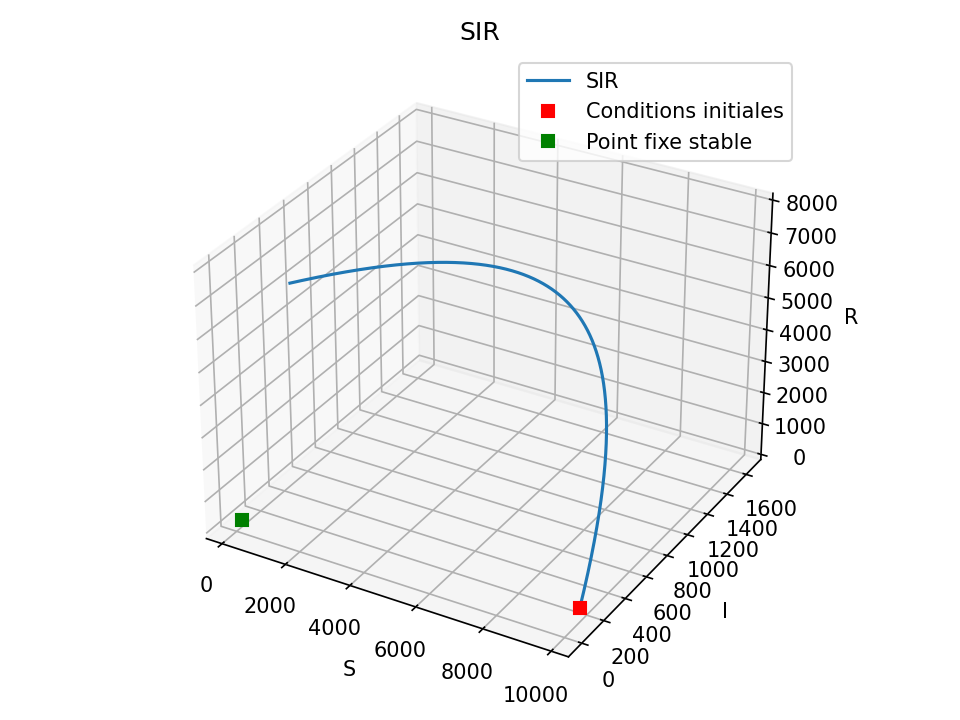

[2.00000000e+02 1.57991497e-22 2.64000000e+02]


In [49]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Nsir[:,0],Nsir[:,1],Nsir[:,2], label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

R = root(SIR,x0=np.array([200,200,200]),args=(X0,β_init,g_init))
print(R.x)

ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()

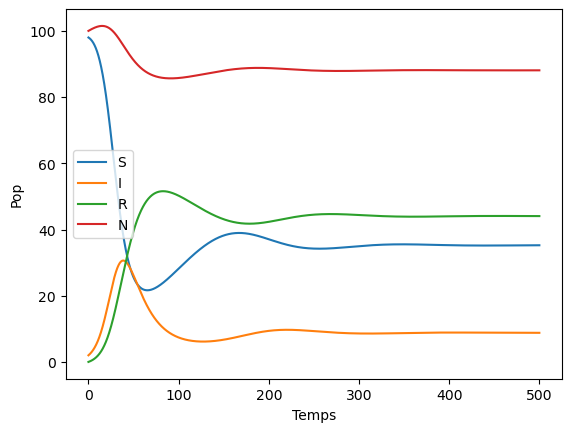

In [6]:
Ns0 = 98
Ni0 = 2
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

g=0.05
β=0.2
B=0.012
d=0.01
p=0.02

def SIR_2(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β*S*I/(S+I+R) - d*S + B*(S+I+R)
    di= β*S*I/(S+I+R) -g*I - d*I - p*I
    dr= g*I - d*R
    return np.array([ds,di,dr])


from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Function defining the scaled SIR model
def SIR_scaled(X, β, g):
    S, I, R = X
    dS = -β * S * I
    dI = β * S * I - g * I
    dR = g * I
    return np.array([dS, dI, dR])

# Iterative method to find a fixed point
def find_fixed_point_scaled(X0, β, g, tolerance=1e-6, max_iterations=100):
    current_state = np.array(X0)
    for _ in range(max_iterations):
        next_state = current_state + SIR_scaled(current_state, β, g)
        if np.linalg.norm(next_state - current_state) < tolerance:
            return next_state
        current_state = next_state
    return current_state

# Initial conditions
Ns0 = 9800
Ni0 = 200
Nr0 = 0
X0 = [Ns0, Ni0, Nr0]

# Total population
N0 = Ns0 + Ni0 + Nr0

# Parameters
β_init = 1.0
g_init = 0.5

# Scale the parameters
β_scaled = β_init / N0
g_scaled = g_init

# Find the fixed point
fixed_point_scaled = find_fixed_point_scaled(X0, β_scaled, g_scaled)

# Unscaled fixed point
fixed_point = fixed_point_scaled * N0

print("Fixed Point:", fixed_point)

# Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns0, Ni0, Nr0, "s", color="r", label="Initial Conditions")
ax.plot(fixed_point[0], fixed_point[1], fixed_point[2], "s", color="g", label="Fixed Point")
plt.legend()
plt.show()


Fixed Point: [1.63827434e+07 7.62079694e-03 8.36172566e+07]


<IPython.core.display.Javascript object>

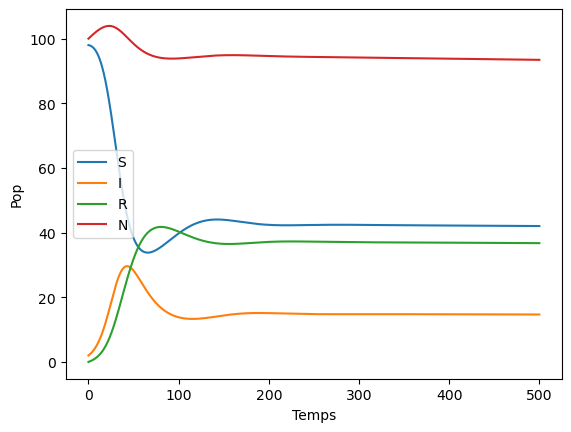

In [10]:
Ns0 = 98
Ni0 = 2
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

g=0.05
β=0.2
B=0.0231
d=0.02
p=0.02

def SIR_2(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β*S*I/(S+I+R) - d*S + B*(S+I+R)
    di= β*S*I/(S+I+R) -g*I - d*I - p*I
    dr= g*I - d*R
    return np.array([ds,di,dr])


from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

En augmentant le renouvellement de la population, un état stationnaire semble ici être atteint plus vite et semble favoriser le maintien de la maladie à un seuil plus élevé

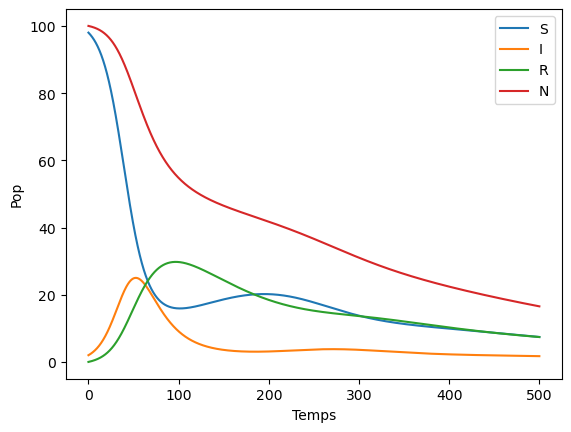

In [36]:
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)

g=0.03
β=0.15
B=0.01
d=0.01
p=0.03

Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

(A dvp) En conditions biologiques : 
- Possible stabilisation du système (Fig 1) = Maladie maintenue à un certain taux
- Si maladie trop infectieuse et mortelle et résistance trop lente (Fig 2) : Fort déclin de la population totale 

/var/folders/9s/lqq830r928bb1cp4lpbbxp600000gn/T/ipykernel_56018/2251406419.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


[-4.59642526e-05 -1.14910631e-05 -5.74553157e-05]


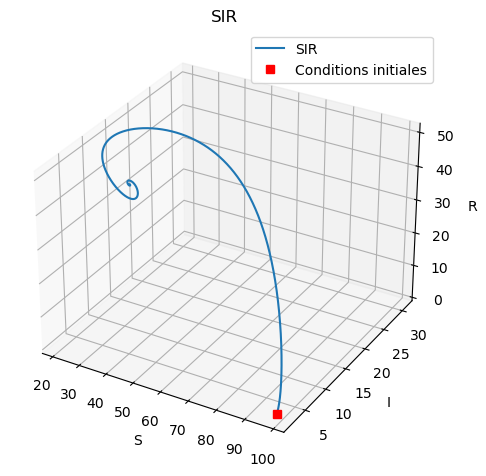

In [41]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns, Ni, Nr, label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

from scipy.optimize import root

#R = root(SIR_2,x0=np.array([50,40,50]),args=(t))
#print(R.x)


ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
#ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()


# Etude des points fixes 

## 1) Modèle SIR simple

\begin{equation}
\begin{cases}
\dot{S}= 0\\
\dot{I}= 0\\
\dot{R}= 0\\
\ N = S + I + R = N_0
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{β}{N_0}SI = 0\\
\frac{β}{N_0}SI - gI = 0\\
\ gI = 0\\
\ S + I + R = N_0
\end{cases}
\Leftrightarrow
\begin{cases}
\ I=0\\
\ S+R=N_0
\end{cases}
\end{equation}

Le modèle SIR simple présente une infinité de points fixes, avec I=0, S entre 0 et N0 et R=N0-S.


### Stabilité des points fixes 

Si S>0 alors dS/dT <=0 et dR>dT >=0. Dès qu'on s'éloigne de l'équilibre (I>0), S diminue et R augmente, l'équilibre est donc instable pour tout S>0, et on atteint un équilibre stable pour S=0 et R=N0. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


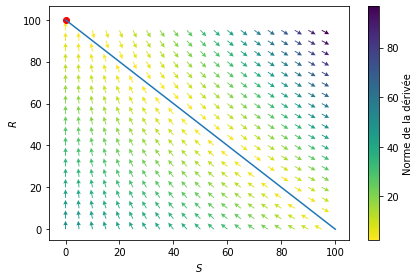

In [39]:
def portrait_de_phase(func, x_min, x_max, step_x, y_min, y_max, step_y, **kwargs):
    
    # On initialise la grille telle qu'on calcule le vecteur de la dérivée en chaque point.
    x_range = np.arange(x_min,x_max,step_x)
    y_range = np.arange(y_min, y_max, step_y)
    x, y = np.meshgrid(x_range, y_range)
    
    # On calcule la dérivée en chaque point.
    dx = func([x,y],0, **kwargs)
    
    # On normalise les vecteurs pour plus de lisibilité. 
    # La norme de la dérivée est montrée par le code couleur.
    dx_norm = lambda i: np.sqrt(dx[0][i]**2 + dx[1][i]**2)
    xx = [dx[0][i]/dx_norm(i) for i in range(len(dx[0]))]
    yy = [dx[1][i]/dx_norm(i) for i in range(len(dx[0]))]
    color = [dx_norm(i) for i in range(len(dx[0]))]
    
    # On affiche les vecteurs sur la grille.
    fig, ax = plt.subplots()
    champ = ax.quiver(x, y, xx, yy, color,headwidth=5, cmap='viridis_r')
    
    cbar=fig.colorbar(champ)
    cbar.set_label('Norme de la dérivée',)
    
    ax.set_xlabel('$S$')
    ax.set_ylabel('$R$')
    
    plt.tight_layout()
    
    return fig, ax

def SIR(X,t,B,N0,g):
    S,R=X
    I=N0-S-R
    dS=-B/N0*S*I
    dR=g*I
    return dS,dR

portrait_de_phase(SIR, 0, 100, 5, 0, 100, 5,B=1,N0=100,g=0.5)

plt.scatter(0,100,color="r")
S=np.linspace(0,100)
R=100-S
plt.plot(S,R)

## 2) Modèle SIR à évolution de la population totale

\begin{equation}
\begin{cases}
\dot{S}=0\\
\dot{I}=0\\
\dot{R}=0
\end{cases}
\Leftrightarrow
\begin{cases}
\ BN - β\frac{SI}{N} -dS = 0\\
\ β\frac{SI}{N} - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\end{equation}

Deux cas possibles : 

S=0 :
\begin{equation}
\begin{cases}
\ BN = 0\\
\ gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\Leftrightarrow
\begin{cases}
\ N = 0\\
\ I = 0\\
\ R = 0
\end{cases}
\end{equation}

En apparence on a un point fixe pour S=0 ; I=0 ; R=0, qui est cohérent avec notre modèle biologique.
Cependant, la dérivée n'est pas calculable en N=0 (division par 0), ce n'est donc pas réellement un point fixe de notre système mathématique.

S constante non-nulle :

\begin{equation}
\begin{cases}
\ BN - β\frac{kI}{N} -dk = 0\\
\ β\frac{kI}{N} - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\Leftrightarrow
\begin{cases}
\ BN - β\frac{kI}{N} -dk = 0\\
\ BN - dk - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\end{equation} 

\begin{equation}
\Leftrightarrow
\begin{cases}
B(1+\mu+\frac{g\mu}{d})S - \frac{\beta}{B}(1+\mu+\frac{g\mu}{d})S - dS = 0 \\
I = \frac{(B-d)S}{g+d+p-B-\frac{g}{d}} = \mu S \\
R = \frac{gI}{d}
\end{cases}
\end{equation}

Si S non-nul, alors : 

\begin{equation}
\Leftrightarrow
\begin{cases}
B(1+\mu+\frac{g\mu}{d}) - \frac{\beta}{B}(1+\mu+\frac{g\mu}{d}) - d = 0 \\
I = \mu S \\
R = \frac{g \mu S}{d}
\end{cases}
\ avec\ \mu = \frac{(B-d)}{g+d+p-B-\frac{g}{d}}
\end{equation}

Pour des paramètres quelconques, il n'y a pas de point fixe du système, le système n'admet un point fixe que pour des paramètres particuliers satisfaisant la première égalité.



### Stabilité du point fixe 

$$
\begin{bmatrix}     B - \beta I \left(\frac{N-S}{N^2}\right) - d & B - \beta S \left(\frac{N-I}{N^2}\right) & B + \beta SI \left(\frac{1}{N^2}\right) \\     \beta I \left(\frac{N-S}{N^2}\right) & \beta S \left(\frac{N-I}{N^2}\right) - g - d - p & -\beta SI \left(\frac{1}{N^2}\right) \\     0 & g & -d 
\end{bmatrix}
$$

